In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adaline_classifier import AdalineSGD

In [11]:
# Preprocess iris data (take only two classes)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
trainset = df.iloc[:100, [0,2]].values
target = df.iloc[:100,4].values
target = np.where(target == 'Iris-setosa', -1, 1)

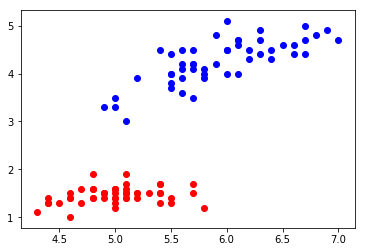

In [12]:
# Plot iris data
plt.scatter(trainset[:50, 0], trainset[:50, 1], color='red')
plt.scatter(trainset[50:, 0], trainset[50:, 1], color='blue')
plt.show()

In [35]:
# Standardize dataset
std_trainset = np.copy(trainset)
std_trainset[:, 0] = (trainset[:, 0] - np.mean(trainset[:, 0])) / np.std(trainset[:, 0])
std_trainset[:, 1] = (trainset[:, 1] - np.mean(trainset[:, 1])) / np.std(trainset[:, 1])

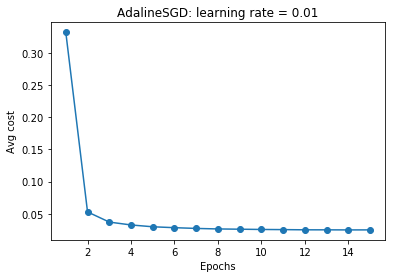

In [36]:
# Train model
adaline = AdalineSGD(n_iters=15, learning_rate=0.01)
adaline.fit(std_trainset, target)
plt.plot(range(1, adaline.n_iters+1), adaline.cost_, marker='o')
plt.title('AdalineSGD: learning rate = 0.01')
plt.xlabel('Epochs'), plt.ylabel('Avg cost')
plt.show()

In [37]:
print(adaline.weights_)
X = std_trainset[0,:]
y = target[0]
adaline.partial_fit(X,y)
print(adaline.weights_)

[-0.00267501 -0.19619775  1.13622436]
[-0.0022629  -0.19643722  1.13580633]
